In [1]:
# Multiple Subplots 
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-white")
import numpy as np 

/tmp/ipykernel_459837/2152695587.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


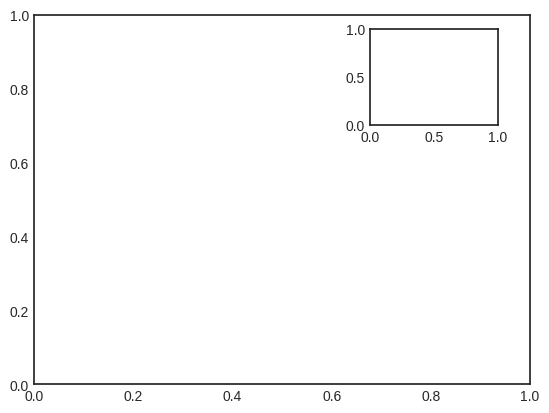

In [2]:
# plt.axes: Subplots by Hand 
ax1 = plt.axes() # standard axes 
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])


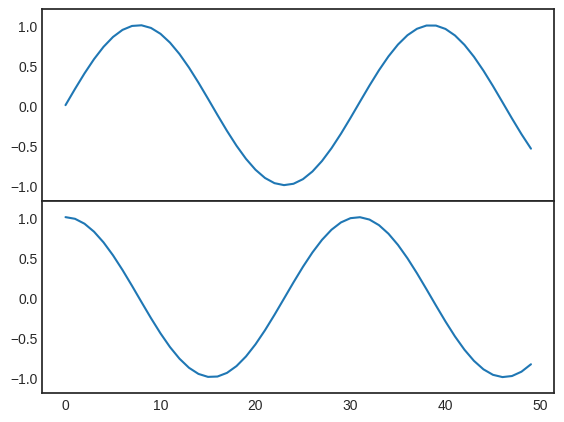

In [3]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))

# заметьте каждая ось испоьлзуется отдельно для плоттинга 
# в неё фигур 
x = np.linspace(0,10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

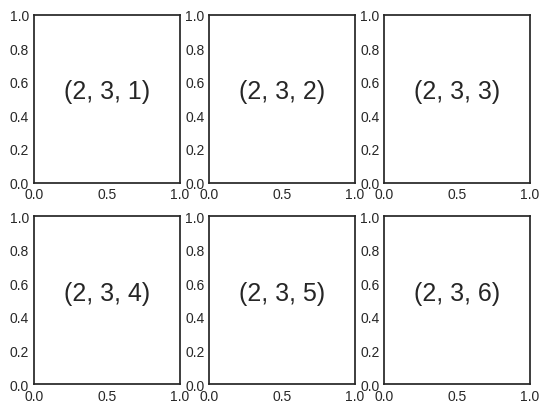

In [4]:
# plt.subplot: Simple Grids of Subplots 

for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5, 0.5, str((2,3,i)),
             fontsize=18, ha="center")

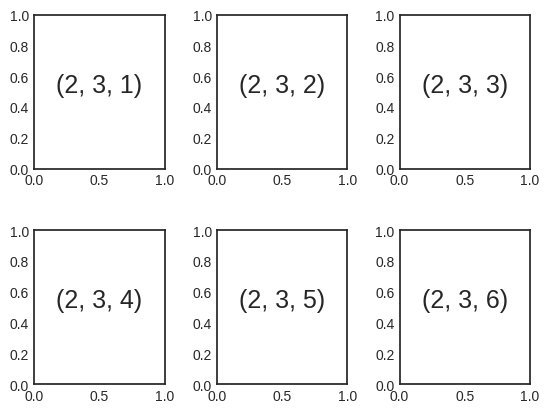

In [5]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    ax.text(0.5, 0.5, str((2,3,i)),
            fontsize=18, ha="center")
    

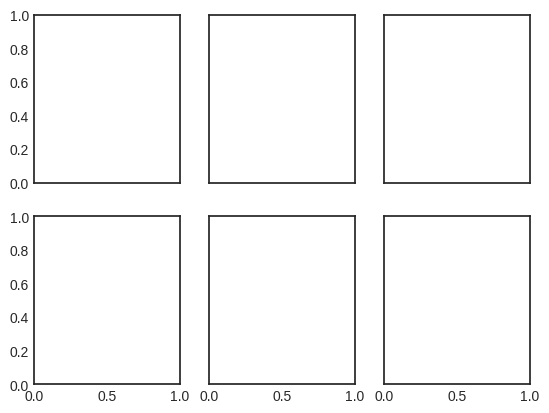

In [6]:
# plt.subplots: The Whole Grid in One Go 
fig,ax = plt.subplots(2,3, sharex="col", sharey="row")

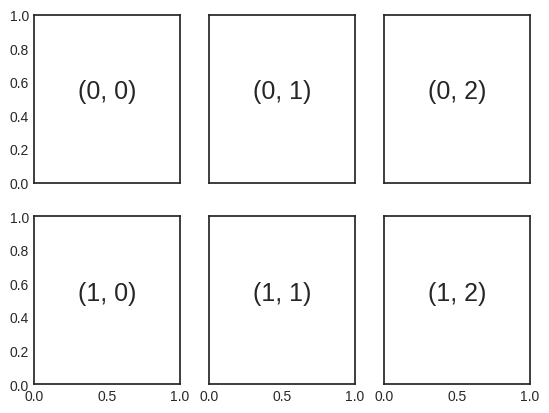

In [8]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5, 0.5, str((i,j)),
                     fontsize=18, ha="center")
fig 

<Axes: >

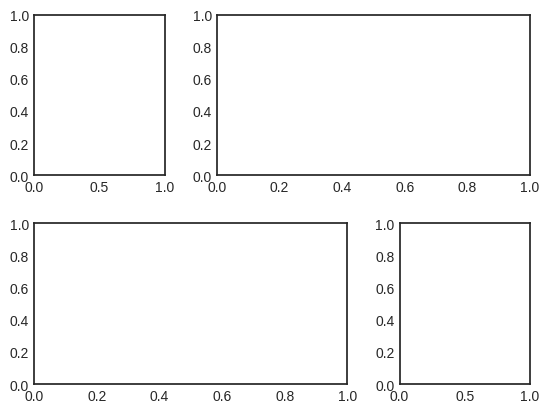

In [9]:
# plt.GridSpec: More Complicated Arrangements 
grid = plt.GridSpec(2,3, wspace=0.4, hspace=0.3)

plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2])

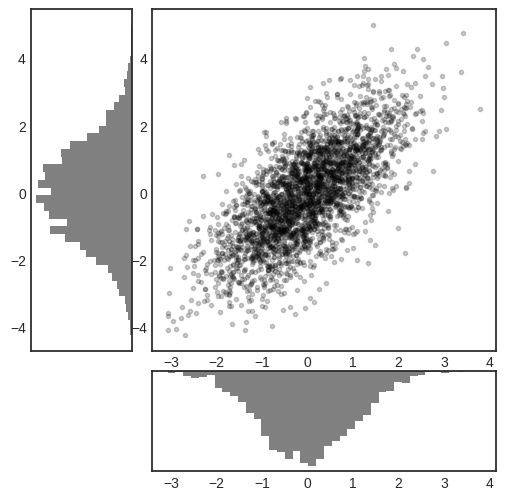

In [25]:
# Create some normally distributed data 
mean = [0, 0]
cov = [[1, 1], [1, 2]]
rng = np.random.default_rng(1701)
x, y = rng.multivariate_normal(mean, cov, 3000).T

# Set up the axes with GridSpec
#fig = plt.figure(figsize=(6,6))
#grid = plt.GridSpec(4,4, hspace=0.2, wspace=0.2)
#main_ax = fig.add_subplot(grid[:-1, 1:])
#y_hist = fig.add_subplot(grid[:-1,0], xticklabels=[], sharey=main_ax)
#x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharey=main_ax)

fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(4,4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1,0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot( grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes 
main_ax.plot(x,y, "ok", markersize=3, alpha=0.2)

# histogram on the attached axes 
x_hist.hist(x, 40, histtype="stepfilled", orientation="vertical", color="gray")
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype="stepfilled", orientation="horizontal", color="gray")
y_hist.invert_xaxis()
